In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

# Assume images.zip is in the root of My Drive
zip_path = '/content/drive/MyDrive/images.zip'
folder_name = 'images'

if not os.path.exists(folder_name):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(folder_name)
    print(f"✅ Extracted '{zip_path}' to folder '{folder_name}'")
else:
    print(f"Folder '{folder_name}' already exists. Skipping extraction.")

print("\n📂 Files inside the folder:")
print(os.listdir(folder_name))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder 'images' already exists. Skipping extraction.

📂 Files inside the folder:
['__MACOSX', 'images']


In [ ]:
# Basic Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Keras Imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau


In [ ]:

# sklearn imports
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
train_dir = os.path.join('images', 'images', 'train')
validation_dir = os.path.join('images', 'images', 'validation')

In [ ]:
# Image Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    zoom_range=0,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Specify the directories to include for training and validation, excluding 'disgust'
train_classes = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']
validation_classes = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale',
    classes=train_classes
)


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale',
    classes=validation_classes
)

Found 28385 images belonging to 6 classes.
Found 6955 images belonging to 6 classes.


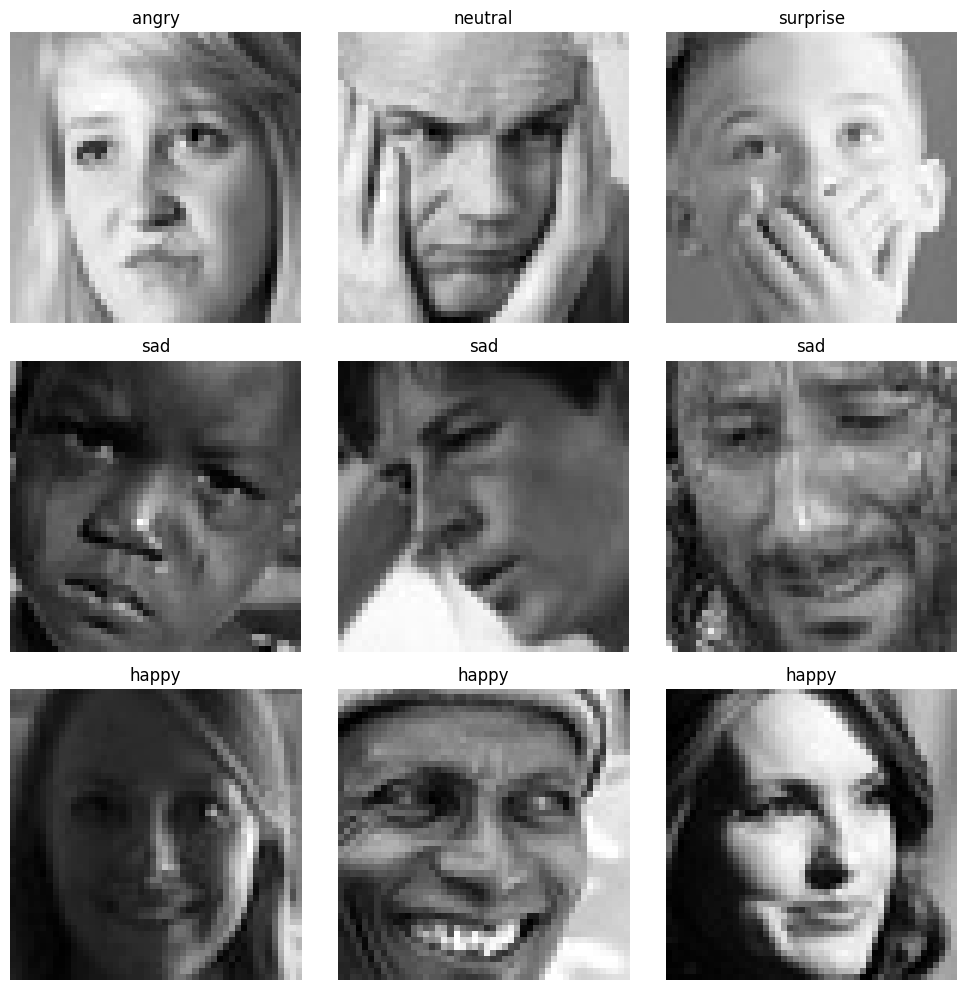

In [ ]:
class_names = list(train_generator.class_indices.keys())

images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(48, 48), cmap='gray')
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# 3. CNN Model Architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(6, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0004), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,474,246 (9.44 MB)

 Trainable params: 2,472,326 (9.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6, verbose=1)

# Model Training
history = model.fit(
    train_generator,
    epochs=70,
    validation_data=validation_generator,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/70


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


444/444 ━━━━━━━━━━━━━━━━━━━━ 31s 47ms/step - accuracy: 0.2761 - loss: 2.3612 - val_accuracy: 0.3403 - val_loss: 1.7519 - learning_rate: 4.0000e-04
Epoch 2/70
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.3950 - loss: 1.6686 - val_accuracy: 0.4861 - val_loss: 1.3277 - learning_rate: 4.0000e-04
Epoch 3/70
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.4576 - loss: 1.4322 - val_accuracy: 0.4753 - val_loss: 1.3714 - learning_rate: 4.0000e-04
Epoch 4/70
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.4914 - loss: 1.3125 - val_accuracy: 0.5111 - val_loss: 1.2748 - learning_rate: 4.0000e-04
Epoch 5/70
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.5260 - loss: 1.2363 - val_accuracy: 0.5515 - val_loss: 1.1811 - learning_rate: 4.0000e-04
Epoch 6/70
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5398 - loss: 1.1890 - val_accuracy: 0.5633 - val_loss: 1.1498 - learning_rate: 4.0000e-04
Epoch 7/70
444/444 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accurac

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step 
              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       1.00      0.22      0.36         9
           2       0.85      0.81      0.83        21
           3       0.27      0.67      0.38         6
           4       0.89      0.53      0.67        15
           5       0.78      1.00      0.88         7

    accuracy                           0.67        64
   macro avg       0.72      0.68      0.63        64
weighted avg       0.79      0.67      0.67        64



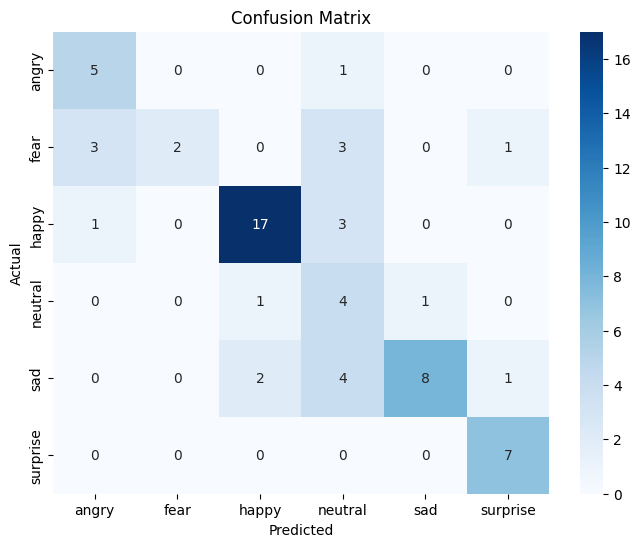

In [ ]:
# 6. Evaluation - Classification Report & Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on the validation set
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
y_true = np.argmax(val_labels, axis=1)
y_pred = np.argmax(predictions, axis=1)

print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def detect_emotion(image_path):
    # Load and preprocess image
    img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict probabilities
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = round(prediction[0][predicted_index] * 100, 2)

    # Print all emotion probabilities
    print("Emotion Probabilities:\n")
    for i, emotion in enumerate(class_names):
        print(f"{emotion:15s}: {prediction[0][i] * 100:.2f}%")

    # Display image with predicted emotion
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Emotion: {predicted_class} ({confidence}%)')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
Emotion Probabilities:

angry          : 0.00%
fear           : 0.00%
happy          : 99.85%
neutral        : 0.00%
sad            : 0.01%
surprise       : 0.13%


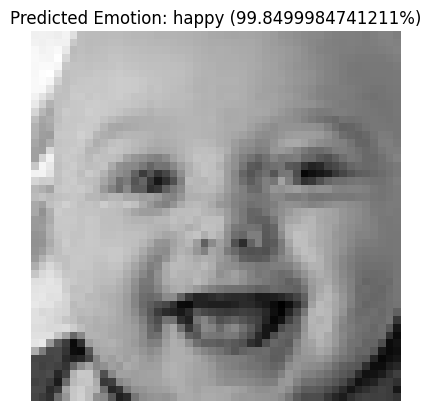

('happy', np.float32(99.85))


In [ ]:
# Example Detection
print(detect_emotion('images/images/train/happy/10005.jpg'))

In [ ]:
model.save('emotion_detection_model.h5')
print("Model saved as 'emotion_detection_model.h5'"*)

Model saved as 'emotion_detection_model.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Emotion Probabilities:

angry          : 0.01%
fear           : 0.00%
happy          : 99.93%
neutral        : 0.06%
sad            : 0.00%
surprise       : 0.00%


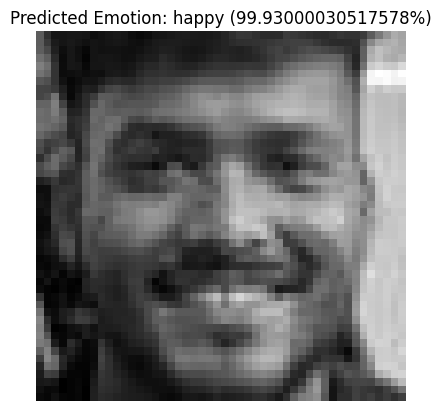

('happy', np.float32(99.93))


In [ ]:
print(detect_emotion('nitin_re.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Emotion Probabilities:

angry          : 0.10%
fear           : 0.03%
happy          : 98.44%
neutral        : 1.31%
sad            : 0.05%
surprise       : 0.06%


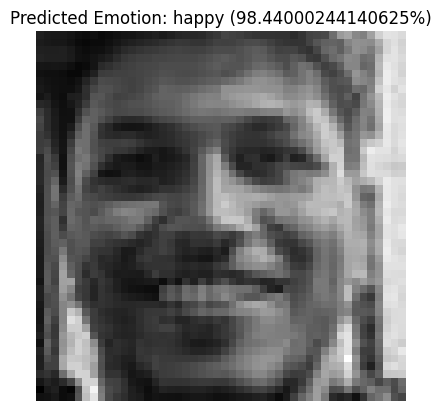

('happy', np.float32(98.44))


In [ ]:
print(detect_emotion('kuld_smile_re.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Emotion Probabilities:

angry          : 5.99%
fear           : 30.41%
happy          : 0.08%
neutral        : 9.16%
sad            : 1.31%
surprise       : 53.05%


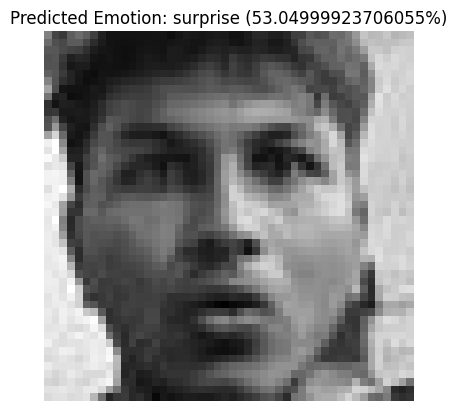

('surprise', np.float32(53.05))


In [ ]:
print(detect_emotion('kuldeep_surprise_re.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Emotion Probabilities:

angry          : 44.11%
fear           : 4.29%
happy          : 1.30%
neutral        : 20.16%
sad            : 29.54%
surprise       : 0.60%


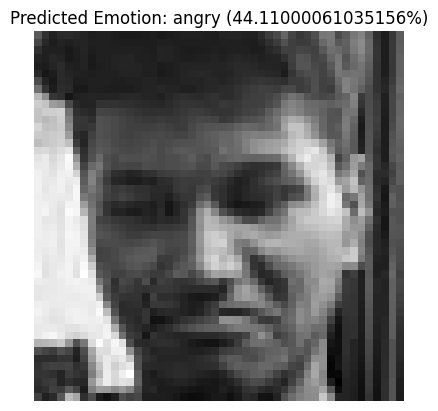

('angry', np.float32(44.11))


In [ ]:
print(detect_emotion('kuldeep_sad_re.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Emotion Probabilities:

angry          : 18.48%
fear           : 0.22%
happy          : 0.69%
neutral        : 66.05%
sad            : 14.54%
surprise       : 0.01%


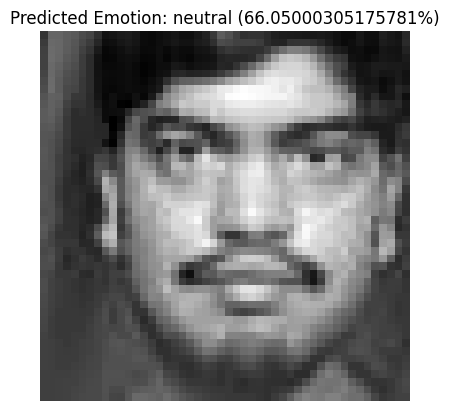

('neutral', np.float32(66.05))


In [ ]:
print(detect_emotion('anshul_neutral_re.jpg'))